In [1]:
!pip install torch torchvision transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

# Resimlerin bulunduğu klasör
data_dir = '/content/drive/MyDrive/Brain'

# Verileri işlemek için dönüşüm işlemleri
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Verisetimizi yükleme
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Verisetini eğitim ve doğrulama setlerine bölüyoruz
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# DataLoader'ları oluşturun
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [4]:
from transformers import BeitForImageClassification, BeitFeatureExtractor
import torch

# Sınıf sayısı
num_classes = 4

# Beit modelini ve feature extractor'ı yükleme
model_name = 'microsoft/beit-base-patch16-224-pt22k-ft22k'
model = BeitForImageClassification.from_pretrained(model_name, num_labels=num_classes, ignore_mismatched_sizes=True)
feature_extractor = BeitFeatureExtractor.from_pretrained(model_name)

# GPU kullanımı için modeli CUDA'ya taşımam gerek
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k-ft22k and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([21841, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([21841]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `BeitFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


model.safetensors:   0%|          | 0.00/414M [00:00<?, ?B/s]

BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          

Epoch 1/5


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Train Loss: 0.4175, Train Accuracy: 0.8339
Validation Loss: 0.1017, Validation Accuracy: 0.9659
Epoch 2/5


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Train Loss: 0.0633, Train Accuracy: 0.9779
Validation Loss: 0.0598, Validation Accuracy: 0.9781
Epoch 3/5


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Train Loss: 0.0169, Train Accuracy: 0.9963
Validation Loss: 0.0595, Validation Accuracy: 0.9790
Epoch 4/5


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Train Loss: 0.0047, Train Accuracy: 0.9991
Validation Loss: 0.0536, Validation Accuracy: 0.9860
Epoch 5/5


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Train Loss: 0.0029, Train Accuracy: 0.9998
Validation Loss: 0.0618, Validation Accuracy: 0.9851


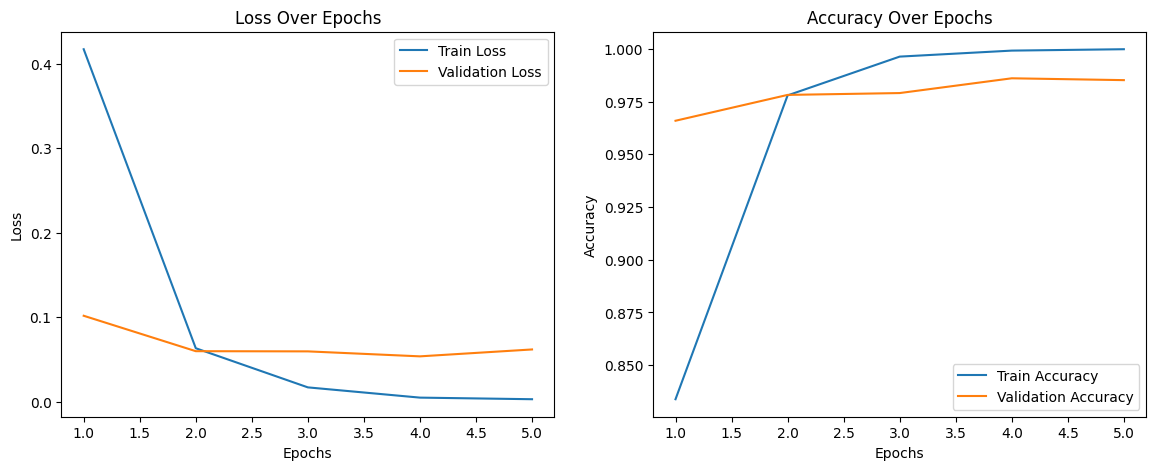

In [5]:
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Hiperparametreleri belirleyin
num_epochs = 5
learning_rate = 5e-5

# Optimizatörü ve öğrenme oranı çizelgesini oluşturun
optimizer = AdamW(model.parameters(), lr=learning_rate)
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_epochs * len(train_loader)
)

# Kayıp fonksiyonunu tanımlayın
loss_fn = torch.nn.CrossEntropyLoss()

# Eğitim ve doğrulama loss ve accuracy değerlerini depolayacak listeler
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Modeli eğitin
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss = 0
    train_correct = 0
    val_loss = 0
    val_correct = 0

    # Eğitim aşaması
    model.train()
    for batch in tqdm(train_loader):
        pixel_values = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values, labels=labels)
        loss = loss_fn(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        train_loss += loss.item() * pixel_values.size(0)
        train_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Doğrulama aşaması
    model.eval()
    with torch.no_grad():
        for batch in tqdm(val_loader):
            pixel_values = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(pixel_values, labels=labels)
            loss = loss_fn(outputs.logits, labels)

            val_loss += loss.item() * pixel_values.size(0)
            val_correct += (outputs.logits.argmax(dim=-1) == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = val_correct / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Loss ve Accuracy değerlerini grafik olarak gösterme
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()


In [6]:
# Modelin ağırlıklarını kaydet
model_save_path = "/content/drive/MyDrive/Brain_weights.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model weights saved to {model_save_path}")


Model weights saved to /content/drive/MyDrive/Brain_weights.pth


In [57]:
from PIL import Image
import numpy as np

# Test etmek istediğiniz resmin yolu
test_image_path = "/content/drive/MyDrive/Brain_test/zzz.png"

# Resmi yükleme ve ön işleme
image = Image.open(test_image_path).convert("RGB")
processed_image = transform(image).unsqueeze(0).to(device)  # Batch boyutunu ekliyoruz

# Model ile tahmin yapma
with torch.no_grad():
    outputs = model(processed_image)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1).item()

# Sınıf isimleri
class_names = dataset.classes
print(f"Predicted class: {class_names[predicted_class]} with probability {probabilities[0][predicted_class]:.4f}")


Predicted class: meningioma with probability 0.9969
